In [1]:
import numpy as np
import imageio
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from skimage.transform import resize
from PIL import Image
import os
import cv2


In [2]:
os.listdir()

['grabcut.py',
 'me.jpg',
 'egg.jpg',
 'segment_result.png',
 'mask_result.png',
 'logo.png',
 'egg_red.jpg',
 'segment_result_transparent.png',
 '.ipynb_checkpoints',
 'bitwise.png',
 'empty_resize_logo.png',
 'resize_logo.png',
 'Graphcut_overlay.ipynb']

frame (1025, 1015, 3)
(800, 600, 3)


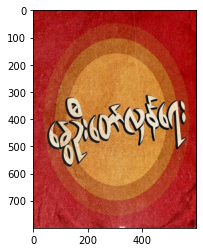

In [3]:
#Read and Display PNG Image

path = 'logo.png'

frame = cv2.imread(path)
frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
print("frame", frame.shape)

img = cv2.resize(frame,(600,800))
print(img.shape)

cv2.imwrite("resize_logo.png",img)

plt.imshow(img)
plt.show()

(1025, 1015, 3)


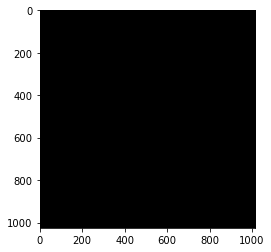

In [4]:
empty = np.zeros(frame.shape)
print(empty.shape)


cv2.imwrite("empty_resize_logo.png",empty)

plt.imshow(empty)

(1025, 1015, 3)


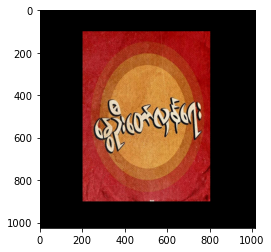

In [5]:
from PIL import Image, ImageDraw, ImageFilter

im1 = Image.open('empty_resize_logo.png')
im2 = Image.open('resize_logo.png')

im1.paste(im2,(200, 100))

im1 = np.array(im1)
print(im1.shape)
im1 = cv2.cvtColor(im1,cv2.COLOR_BGR2RGB)

plt.imshow(im1)

(1025, 1015, 3)


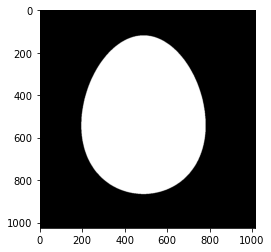

In [6]:

#mask

path_m = 'mask_result.png'


mask_img = cv2.imread(path_m)
mask_img = cv2.resize(mask_img,(frame.shape[1],frame.shape[0]))
print(mask_img.shape)


plt.imshow(mask_img,cmap="gray")
plt.show()

True

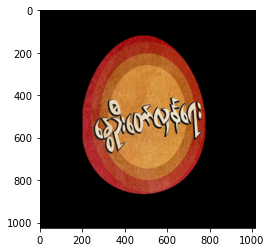

In [9]:
dst = cv2.bitwise_and(im1,mask_img)
plt.imshow(dst)
cv2.imwrite("bitwise.png", cv2.cvtColor(dst,cv2.COLOR_BGR2RGB))

In [10]:
import cv2
file_name = "bitwise.png"

src = cv2.imread(file_name, 1)
tmp = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
_,alpha = cv2.threshold(tmp,0,255,cv2.THRESH_BINARY)
b, g, r = cv2.split(src)
rgba = [b,g,r, alpha]
dst = cv2.merge(rgba,4)
cv2.imwrite("transparent_final.png", dst)

True

# Histogram


In [ ]:
#Histogram Analaysis

plt.hist(img[:,:,3].flatten())
plt.show()


In [ ]:
#POKE DIM = (200,200)  (OVERLAY IMAGE DIM)
#NEW_WIDTH 

# Working with Real Image

In [ ]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt


path = "overlay/logo.png"
name = path.split("/") [1]
print(name)

logo_hist = cv2.imread(path,0)
plt.hist(logo_hist.ravel(),256,[0,256]); plt.show()

In [ ]:
img = cv2.imread(path)

size = 200
logo = cv2.resize(img, (size, size))
print(logo.shape)

plt.imshow(logo)

In [ ]:
import cv2

#Gray Scale Convert
gray = cv2.cvtColor(logo, cv2.COLOR_BGR2GRAY)
print(gray.shape)

In [ ]:
#Smoothing / Blur
blur = cv2.GaussianBlur(gray,(5,5),0)

#Mask/Thresholding
_, mask = cv2.threshold(blur, 120, 255, cv2.THRESH_BINARY)
plt.imshow(mask,cmap='gray')

In [ ]:
#Opening
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
plt.imshow(opening)

In [ ]:

fmask = cv2.resize(opening, logo.shape[1::-1])
fmask = cv2.cvtColor(fmask,cv2.COLOR_GRAY2BGR)
print(fmask.shape)
print(logo.shape)
dst = cv2.bitwise_and(fmask, logo)
plt.imshow(dst)


In [ ]:
sav_mask = cv2.cvtColor(dst,cv2.COLOR_BGR2RGB)
plt.imshow(sav_mask)
plt.imsave("save_mask.png",sav_mask)


In [ ]:
# import cv2
# import numpy as np
 
 
# cap = cv2.VideoCapture(0)
# # This is preprocessing
# # cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
# # cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)
 

    
# # The main loop
# while True:
#     _, frame = cap.read()
#     # This is the processing
#     #frame = cv2.resize(frame, (640, 480))
#     frame = cv2.flip(frame, 1)
 
#     roi = frame[-size-10:-10, -size-10:-10]
#     roi[np.where(opening)] = 0
    
#     # Here we show the image in a window
#     cv2.imshow("Webcam_roi", roi)

#     roi += dst
 
#     # Here we show the image in a window
#     cv2.imshow("Webcam", frame)
 
#     # Check if q was pressed
#     if cv2.waitKey(1) == ord('q'):
#         break

# Apply on Single Image

In [ ]:
import cv2
import numpy as np
 


frame = cv2.imread("profile2.jpg")
frame =  cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
w , h , ch = frame.shape
#roi = frame[-size-10:-10, -size-10:-10] 
plt.imshow(frame)

In [ ]:
roi = frame[380:510, 595:720]         #img[y:y+h, x:x+w]
print(roi.shape)
plt.imshow(roi)

In [ ]:
opening_w = cv2.resize(opening,(125,130))
opening_w = cv2.cvtColor(opening_w,cv2.COLOR_BGR2RGB)
print(opening_w.shape)
plt.imshow(opening_w)

In [ ]:
sav_mask = cv2.cvtColor(dst,cv2.COLOR_BGR2RGB)
sav_mask = cv2.resize(sav_mask,(125,130))
plt.imshow(sav_mask)

In [ ]:
roi[np.where(opening_w)] = 0
roi += sav_mask
 

frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
plt.imshow(frame)
plt.imsave("crph_save.jpg",frame)